# Lab 2 - Computational Intelligence 2024

In [ ]:
## Kernel
# #
# C:\Users\Lorenzo Ugoccioni\Documents\PoliTo\LM - III anno\Computational Intelligence\Labs\.venv\Scripts\python.exe

In [2]:
import logging
from tqdm import tqdm 
from itertools import combinations
import pandas as pd
import numpy as np
import geopy.distance
import matplotlib.pyplot as plt
import random

from icecream import ic

logging.basicConfig(level=logging.DEBUG)

In [178]:
cities = pd.read_csv('cities/russia.csv', header=None, names=['City', 'x', 'y'])
cities

,City,x,y
0,Abakan,53.72,91.4300
1,Achinsk,56.28,90.5000
2,Almetyevsk,54.90,52.3100
3,Angarsk,52.57,103.9100
4,Arkhangelsk,64.57,40.5300
...,...,...,...
162,Yuzhno‐Sakhalinsk,46.95,142.7400
163,Zelenograd,55.94,37.2900
164,Zheleznodorozhnyy,55.75,38.0167
165,Zhukovskiy,55.55,38.2500


In [179]:
def compute_geografic_distance_matrix(cities):
    dist_matrix = np.zeros((len(cities), len(cities)))
    for c1, c2 in combinations(cities.itertuples(), 2):
        dist_matrix[c1.Index, c2.Index] = dist_matrix[c2.Index, c1.Index] = geopy.distance.geodesic(
            (c1.x, c1.y), (c2.x, c2.y)
        ).km

    np.fill_diagonal(dist_matrix, np.inf)
    return dist_matrix

def compute_euclidean_distance_matrix(cities):
    dist_matrix = np.zeros((cities.shape[0], cities.shape[0]))
    x_coords = cities['x'].values
    y_coords = cities['y'].values

    # Use broadcasting to calculate the Euclidean distance for all pairs of cities
    dist_matrix = np.sqrt((x_coords[:, np.newaxis] - x_coords[np.newaxis, :])**2 + 
                          (y_coords[:, np.newaxis] - y_coords[np.newaxis, :])**2)
    # Set diagonal to infinity to avoid self-loops (distance from a city to itself is set to inf)
    np.fill_diagonal(dist_matrix, np.inf)
    return dist_matrix

### Plot

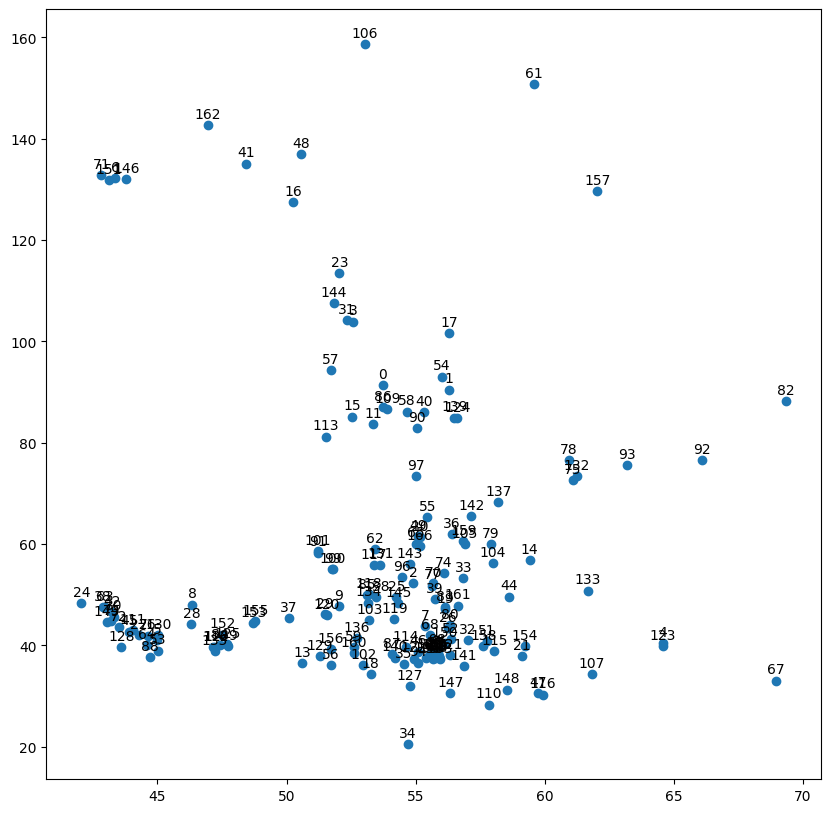

In [180]:
def plot_cities_graph(cities, path):    
    coord_X = cities['x'].values
    coord_Y = cities['y'].values
    plt.figure(figsize=(10,10))
    plt.scatter(coord_X, coord_Y)

    for i in range(len(coord_X)):
        plt.annotate(i, (coord_X[i], coord_Y[i]), textcoords="offset points", xytext=(0, 5), ha='center')

    if path is not None:
        plt.scatter(coord_X[path[0]], coord_Y[path[0]], color='green', )

        for i in range(len(path)):
            plt.plot([coord_X[path[i%len(path)]], coord_X[path[(i+1)%len(path)]]], [coord_Y[path[i%len(path)]], coord_Y[path[(i+1)%len(path)]]], color='black')
        
        #for i in range(len(coord_X)):
        #    plt.annotate(i, (coord_X[i], coord_Y[i]), textcoords="offset points", xytext=(0, 5), ha='center')

plot_cities_graph(cities, None)

In [181]:
compute_geografic_distance_matrix(cities)

array([[          inf,  291.12871812, 2516.33442321, ..., 3362.12841679,
        3355.47113782, 2050.06392452],
       [ 291.12871812,           inf, 2381.82002726, ..., 3193.60912629,
        3188.93291068, 1926.10828983],
       [2516.33442321, 2381.82002726,           inf, ...,  910.55556581,
         896.09053896,  470.05123237],
       ...,
       [3362.12841679, 3193.60912629,  910.55556581, ...,           inf,
          26.67478928, 1364.47235502],
       [3355.47113782, 3188.93291068,  896.09053896, ...,   26.67478928,
                  inf, 1352.4715425 ],
       [2050.06392452, 1926.10828983,  470.05123237, ..., 1364.47235502,
        1352.4715425 ,           inf]])

### Greedy Solution

In [191]:
visited_city = np.full(len(cities), False)
min_dist = np.inf
cities_distance = compute_geografic_distance_matrix(cities)

percorso = []

next_city = np.argmin(cities_distance, axis=0)

for i in next_city:
    if i == next_city[next_city[i]]:
        if cities_distance[i, next_city[i]] < min_dist:
            min_dist = cities_distance[i, next_city[i]]
            percorso.clear()
            percorso.extend([int(i), int(next_city[i])])

visited_city[percorso] = True
cities_distance[percorso] = np.inf

while not np.all(visited_city):
    print(f'{" ".join(map(str, percorso))}')
    next_city = np.argmin(cities_distance[:, [percorso[0], percorso[-1]]], axis=0)
    starting_city = np.argmin(cities_distance[next_city, [percorso[0], percorso[-1]]])
    if starting_city:
        percorso.append(int(next_city[starting_city]))
    else:
        percorso.insert(0, int(next_city[starting_city]))

    visited_city[percorso] = True
    cities_distance[percorso] = np.inf

print(f'Percorso:\n{" ".join(map(str, percorso))}')

100 99
100 99 117
100 99 117 131
100 99 117 131 143
100 99 117 131 143 96
100 99 117 131 143 96 2
100 99 117 131 143 96 2 70
100 99 117 131 143 96 2 70 77
100 99 117 131 143 96 2 70 77 33
100 99 117 131 143 96 2 70 77 33 74
91 100 99 117 131 143 96 2 70 77 33 74
101 91 100 99 117 131 143 96 2 70 77 33 74
101 91 100 99 117 131 143 96 2 70 77 33 74 104
101 91 100 99 117 131 143 96 2 70 77 33 74 104 14
62 101 91 100 99 117 131 143 96 2 70 77 33 74 104 14
65 62 101 91 100 99 117 131 143 96 2 70 77 33 74 104 14
166 65 62 101 91 100 99 117 131 143 96 2 70 77 33 74 104 14
20 166 65 62 101 91 100 99 117 131 143 96 2 70 77 33 74 104 14
49 20 166 65 62 101 91 100 99 117 131 143 96 2 70 77 33 74 104 14
36 49 20 166 65 62 101 91 100 99 117 131 143 96 2 70 77 33 74 104 14
159 36 49 20 166 65 62 101 91 100 99 117 131 143 96 2 70 77 33 74 104 14
105 159 36 49 20 166 65 62 101 91 100 99 117 131 143 96 2 70 77 33 74 104 14
79 105 159 36 49 20 166 65 62 101 91 100 99 117 131 143 96 2 70 77 33 74 104 14


In [192]:
cities_distance = compute_geografic_distance_matrix(cities)

print(f"Cities tour: {' -> '.join([cities.iat[percorso[t%len(percorso)], 0] for t in range(len(percorso)+1)])}")
print(f"Distance covered: {np.sum([cities_distance[percorso[t%len(percorso)], percorso[(t+1)%len(percorso)]] for t in range(len(percorso)) ])}")

Cities tour: Blagoveshchensk -> Nakhodka -> Vladivostok -> Artyom -> Ussuriysk -> Khabarovsk -> Komsomolsk‐na‐Amure -> Yuzhno‐Sakhalinsk -> Petropavlovsk‐Kamchatskiy -> Magadan -> Yakutsk -> Bratsk -> Chita -> Ulan‐Ude -> Irkutsk -> Angarsk -> Kyzyl -> Abakan -> Krasnoyarsk -> Achinsk -> Omsk -> Rubtsovsk -> Novosibirsk -> Barnaul -> Biysk -> Novokuznetsk -> Prokopyevsk -> Leninsk‐Kuznetskiy -> Kemerovo -> Tomsk -> Seversk -> Norilsk -> Novyy Urengoy -> Noyabrsk -> Nizhnevartovsk -> Surgut -> Nefteyugansk -> Tobolsk -> Kurgan -> Tyumen -> Nizhniy Tagil -> Pervouralsk -> Yekaterinburg -> Kamensk‐Uralskiy -> Kopeysk -> Chelyabinsk -> Zlatoust -> Miass -> Magnitogorsk -> Orsk -> Novotroitsk -> Orenburg -> Orenberg -> Salavat -> Sterlitamak -> Ufa -> Oktyabrskiy -> Almetyevsk -> Naberezhnye Chelny -> Nizhnekamsk -> Izhevsk -> Neftekamsk -> Perm -> Berezniki -> Syktyvkar -> Kirov -> Yoshkar‐Ola -> Novocheboksarsk -> Cheboksary -> Kazan -> Ulyanovsk -> Dimitrovgrad -> Tolyatti -> Novokuybysh

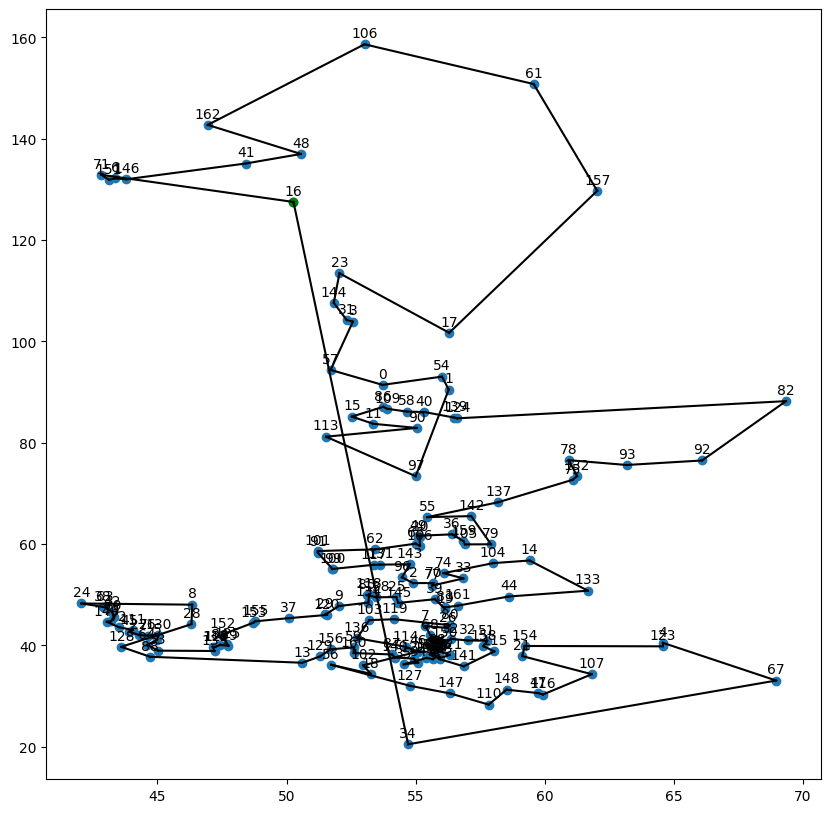

In [193]:
plot_cities_graph(cities, percorso)

## Genetic Alghorithm

In [182]:
class SalesMan:
    def __init__(self, path: list[int], length: float = None):
        self.path = path
        self.length = length

    def set_length(self):
        self.length = np.sum([cities_distance[self.path[t%len(self.path)], self.path[(t+1)%len(self.path)]] for t in range(len(self.path))])
        return self

    def get_path(self) -> list[int]:
        return self.path
    
    def get_length(self) -> float :
        return self.length
    
    def copy(self):
        return SalesMan(path=self.path[:])

In [183]:
def starting_population(pop_size, num_cities):
    start_pop = [ SalesMan(path=np.random.permutation(num_cities)) for _ in range(pop_size) ]
    start_pop = [ ind.set_length() for ind in start_pop ]
    return start_pop

cities_distance = compute_geografic_distance_matrix(cities)

In [184]:
TOURNAMENT_SIZE = 10
NUM_GENERATIONS = 500
POPULATION_SIZE = 200
NUM_OFFSPRING = 50

### Mutation Techniques

In [153]:
def mutation(ind):  # 2 loci(gene) swapped
    offspring = ind.copy()
    idx1, idx2 = random.randint(0, len(ind.path) - 1), random.randint(0, len(ind.path) - 1)
    offspring.path[idx1], offspring.path[idx2] = offspring.path[idx2], offspring.path[idx1]
    offspring.set_length()
    return offspring


def mutation_n(ind, mutation_prob=0.2):  # loci(gene) swapped if under a threshold
    offspring = ind.copy()
    while random.random() < mutation_prob:
        idx1, idx2 = random.randint(0, len(ind.path) - 1), random.randint(0, len(ind.path) - 1)
        offspring.path[idx1], offspring.path[idx2] = offspring.path[idx2], offspring.path[idx1]
    offspring.set_length()
    return offspring

def macro_mutation(ind, mutation_prob=0.2):  # loci(gene) swapped if under a threshold
    offspring = ind.copy()
    #   ... develop strategy    ...
    return offspring

### Recombination Techniques

In [154]:
def Partially_Mapped_Crossover(p1: SalesMan, p2: SalesMan) -> (SalesMan, SalesMan) :
    parent_path1, parent_path2 = p1.get_path(), p2.get_path()
    path1, path2 = [-1 for _ in range(len(parent_path1))], [-1 for _ in range(len(parent_path1))]
    cut_points = [None, None]

    while cut_points[0] == cut_points[1]:
        cut_points = [random.randint(0, len(parent_path1) - 1) for _ in range(len(cut_points))]
    
    # Crossover inside the cut point & mapping inside the cut
    for j in range(min(cut_points), max(cut_points)):
        path1[j] = int(parent_path2[j])
        path2[j] = int(parent_path1[j])
    
    # Fill w/cities not in conflict. Use mapping to fill if a city is present in the cut

    for i in range(0, min(cut_points)):
        if parent_path1[i] not in path1:
            path1[i] = int(parent_path1[i])
        else:
            idx = path1.index(parent_path1[i])
            while int(parent_path1[idx]) in path1:
                idx = path1.index(parent_path1[idx])
            path1[i] = int(parent_path1[idx])

        if parent_path2[i] not in path2:
            path2[i] = int(parent_path2[i])
        else:
            idx = path2.index(parent_path2[i])
            while int(parent_path2[idx]) in path2:
                idx = path2.index(parent_path2[idx])
            path2[i] = int(parent_path2[idx])
            
    for i in range(max(cut_points), len(path1)):
        if parent_path1[i] not in path1:
            path1[i] = int(parent_path1[i])
        else:
            idx = path1.index(parent_path1[i])
            while int(parent_path1[idx]) in path1:
                idx = path1.index(parent_path1[idx])
            path1[i] = int(parent_path1[idx])

        if parent_path2[i] not in path2:
            path2[i] = int(parent_path2[i])
        else:
            idx = path2.index(parent_path2[i])
            while int(parent_path2[idx]) in path2:
                idx = path2.index(parent_path2[idx])
            path2[i] = int(parent_path2[idx])
            
    offspring1, offspring2 = SalesMan(path1), SalesMan(path2)
    return offspring1.set_length(), offspring2.set_length()

### Parent Selection

In [155]:
def roulette_wheel(population):  # Roulette wheel with same probability
    return random.choice(population)

def roulette_wheel_fitness_weight(population):  # Roulette wheel with fitness as weight
    w = [ind[1] for ind in population]
    return random.choices(population, weights=w, k=1)[0][0]

def static_tournament(population):
    pool = [random.choice(population) for _ in range(TOURNAMENT_SIZE)]
    champ = max(pool, key=lambda ind: ind[1])
    return champ[0]

def best_parent_ever(population):
    champ = max(population, key=lambda ind: ind[1])
    return champ[0]

def genotype_distance(population):  # Select the 2 element with most different genotype
    distance = np.array(
        [[sum(np.bitwise_xor(np.array(population[i][0]), np.array(population[j][0]))) for j in range(len(population))]
         for i in range(len(population))])
    max_position = np.unravel_index(np.argmax(distance, axis=None), distance.shape)

    return population[max_position[0]][0], population[max_position[1]][0]

### Survival Selection

In [156]:
def distance_ind(population):  # Use the distance in the genotype as a selecting criteria
    distance = np.array([[sum(np.bitwise_xor(np.array(population[i][0]), np.array(population[j][0]))) for j in range(len(population))]
         for i in range(len(population))])
    avg_distance_ind = sorted([(np.sum(ind)/(len(ind) - 1), i) for i, ind in enumerate(distance)], reverse=True)

    copy_population = [population[avg_distance_ind[ind][1]] for ind in range(len(population))]    # ORDERING FROM BEST TO WORSE
    return copy_population[:POPULATION_SIZE]  # SURVIVAL SELECTION

def survival_selection(population):
    population.sort(key=lambda ind: ind[1], reverse=True)  # ORDERING FROM BEST TO WORSE
    return population[:POPULATION_SIZE]  # SURVIVAL SELECTION

def remove_twin(population):  # Remove TWIN from the population because I belive that they will have the same fitness
    twins = {j for i in range(len(population)) for j in range(i + 1, len(population)) if population[i] == population[j]}
    new_p = [ind for i, ind in enumerate(population) if i not in twins]
    return new_p

def survive_only_the_best(population):
    population.sort(key=lambda ind: ind[1], reverse=True)  # ORDERING FROM BEST TO WORSE
    return population[:1]  # SURVIVAL SELECTION

###

In [185]:
def GA(population_size=100, num_generations=75, num_offspring=20):
    current_population = starting_population(population_size, cities_distance.shape[0])
    history = list()

    for n in tqdm(range(num_generations)):
        offsprings = []

        for _ in range(int(num_offspring/2)):      #   NEW OFFSPRING TO THE POPULATION
            p1, p2 = roulette_wheel(current_population), roulette_wheel(current_population)
            offspring1, offspring2 = Partially_Mapped_Crossover(p1, p2)
            mut = random.choice([mutation, mutation_n])
            offsprings.extend([mut(offspring1), mut(offspring2)])
        
        current_population.extend(offsprings)
        current_population.sort(key=lambda i:i.length)       # ORDERING FROM BEST TO WORSE
        current_population = current_population[:population_size]       # SURVIVAL SELECTION

        #print(f"Best Salesman of {n+1}° generation travels {round(current_population[0].get_length(), 2)} km  to cover all cities")
        history.append(current_population[0].get_length())

    print(f"Best Salesman travels {round(current_population[0].get_length(), 2)} km  to cover all cities\n")

    return history, current_population[0]

In [189]:
GA_history, bestSalesman = GA(population_size=POPULATION_SIZE, num_generations=NUM_GENERATIONS, num_offspring=NUM_OFFSPRING)

100%|██████████| 500/500 [00:09<00:00, 51.55it/s]


Best Salesman travels 148097.32 km  to cover all cities



### Plot history

Cities tour: 119 -> 32 -> 83 -> 160 -> 136 -> 80 -> 166 -> 49 -> 20 -> 65 -> 118 -> 89 -> 152 -> 84 -> 19 -> 4 -> 95 -> 107 -> 60 -> 68 -> 129 -> 121 -> 127 -> 126 -> 145 -> 165 -> 69 -> 164 -> 27 -> 158 -> 141 -> 50 -> 163 -> 108 -> 12 -> 38 -> 42 -> 45 -> 112 -> 6 -> 106 -> 61 -> 16 -> 157 -> 3 -> 54 -> 58 -> 9 -> 120 -> 103 -> 114 -> 53 -> 5 -> 130 -> 64 -> 59 -> 125 -> 88 -> 63 -> 96 -> 39 -> 105 -> 133 -> 104 -> 62 -> 132 -> 144 -> 23 -> 14 -> 134 -> 147 -> 81 -> 139 -> 124 -> 36 -> 131 -> 117 -> 143 -> 70 -> 74 -> 78 -> 17 -> 48 -> 31 -> 149 -> 135 -> 156 -> 98 -> 26 -> 85 -> 100 -> 91 -> 25 -> 21 -> 66 -> 10 -> 115 -> 1 -> 40 -> 11 -> 82 -> 113 -> 15 -> 57 -> 29 -> 153 -> 76 -> 128 -> 22 -> 122 -> 123 -> 67 -> 37 -> 161 -> 137 -> 75 -> 0 -> 90 -> 111 -> 28 -> 8 -> 43 -> 87 -> 56 -> 47 -> 116 -> 110 -> 148 -> 142 -> 55 -> 2 -> 102 -> 18 -> 13 -> 150 -> 77 -> 101 -> 97 -> 99 -> 24 -> 30 -> 94 -> 109 -> 86 -> 146 -> 41 -> 162 -> 151 -> 71 -> 159 -> 73 -> 72 -> 138 -> 79 -> 93 -> 92

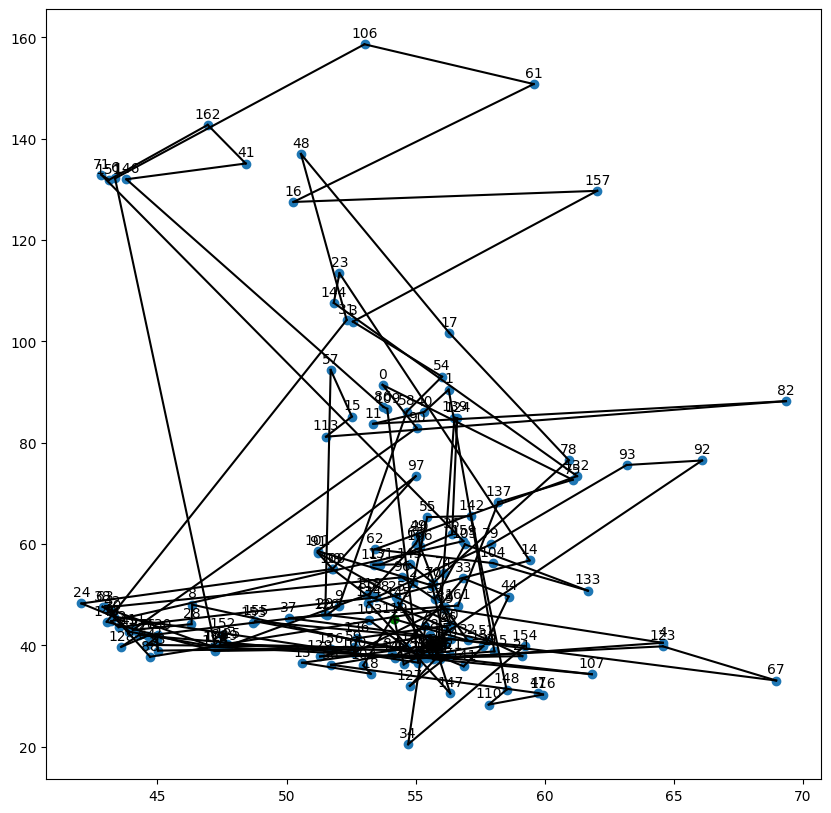

In [190]:
plot_cities_graph(cities, bestSalesman.get_path())
percorso = bestSalesman.get_path()

print(f"Cities tour: {' -> '.join([str(percorso[t%len(percorso)]) for t in range(len(percorso)+1)])}")
print(f"Cities tour: {' -> '.join([cities.iat[percorso[t%len(percorso)], 0] for t in range(len(percorso)+1)])}")
print(f"Distance covered: {np.sum([cities_distance[percorso[t%len(percorso)], percorso[(t+1)%len(percorso)]] for t in range(len(percorso)) ])}")

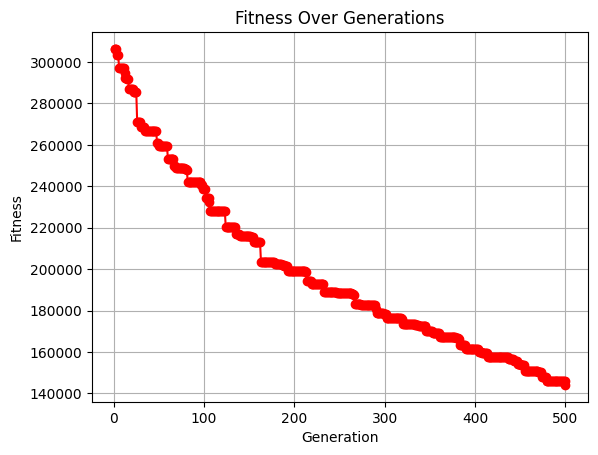

In [188]:
GA_history = np.array(GA_history)

generations = list(range(1, NUM_GENERATIONS + 1))
plt.plot(generations, GA_history, marker='o', linestyle='-', color='r')
plt.title('Fitness Over Generations')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.grid(True)
plt.show()